In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

To build a pandas table from the 'echocardiogram.data' file including the names of all columns, let's first create a list with the names of the columns and then use the pandas.read_table command.

In [2]:
names = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 
         'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']

df1 = pd.read_table('echocardiogram.data', sep=',', names=names)

In [3]:
df1.head()

survival  still-alive age-at-heart-attack  pericardial-effusion  \
0      11.0            0                  71                     0   
1      19.0            0                  72                     0   
2      16.0            0                  55                     0   
3      57.0            0                  60                     0   
4      19.0            1                  57                     0   

  fractional-shortening    epss   lvdd wall-motion-score wall-motion-index  \
0                 0.260       9  4.600                14                 1   
1                 0.380       6  4.100                14             1.700   
2                 0.260       4  3.420                14                 1   
3                 0.253  12.062  4.603                16             1.450   
4                 0.160      22  5.750                18             2.250   

    mult  name group alive-at-1  
0      1  name     1          0  
1  0.588  name     1          0  
2      1  name     1          0  
3  0.788  name     1          0  
4  0.571  name     1          0

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               110 non-null    float64
 1   still-alive            110 non-null    int64  
 2   age-at-heart-attack    110 non-null    object 
 3   pericardial-effusion   110 non-null    int64  
 4   fractional-shortening  110 non-null    object 
 5   epss                   110 non-null    object 
 6   lvdd                   110 non-null    object 
 7   wall-motion-score      110 non-null    object 
 8   wall-motion-index      110 non-null    object 
 9   mult                   110 non-null    object 
 10  name                   110 non-null    object 
 11  group                  110 non-null    object 
 12  alive-at-1             110 non-null    object 
dtypes: float64(1), int64(2), object(10)
memory usage: 11.3+ KB


# Exploratory Data Analysis

We will use Pandas Profiling to build a report of the Echocardiogram dataset that gives a deeper view of the feature distributions on the dataset.

In [5]:
# import ProfileReport
from pandas_profiling import ProfileReport

# Execute profile
profile1 = ProfileReport(df1, title='Report of Echocardiogram - Pandas Profiling', html={'style':{'full_width':True}})
profile1

As we can see, most of the continuous variables are seen as object type and there are meaningless features that are less important for our model creation. Let's drop the meaningless 'name', 'group' and 'alive-at-1' columns and convert the remaining object ones into numerical features.

In [6]:
df1 = df1.drop(['name', 'group', 'alive-at-1'], axis=1)

df1[['age-at-heart-attack', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score',
   'wall-motion-index', 'mult']] = df1[['age-at-heart-attack', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score',
   'wall-motion-index', 'mult']].apply(pd.to_numeric, errors = 'coerce')
df1.head()

survival  still-alive  age-at-heart-attack  pericardial-effusion  \
0      11.0            0                 71.0                     0   
1      19.0            0                 72.0                     0   
2      16.0            0                 55.0                     0   
3      57.0            0                 60.0                     0   
4      19.0            1                 57.0                     0   

   fractional-shortening    epss   lvdd  wall-motion-score  wall-motion-index  \
0                  0.260   9.000  4.600               14.0               1.00   
1                  0.380   6.000  4.100               14.0               1.70   
2                  0.260   4.000  3.420               14.0               1.00   
3                  0.253  12.062  4.603               16.0               1.45   
4                  0.160  22.000  5.750               18.0               2.25   

    mult  
0  1.000  
1  0.588  
2  1.000  
3  0.788  
4  0.571

Remembering that the patients had their heart attacks at different times and some of them have survived less than one year but are still alive, these data are regarded as censored data because these patients were alive during the data collection period but we do not know their survival months after the data was collected. We will remove such data.

In [7]:
df1_CensoredData = df1[(df1['survival']<12) & (df1['still-alive']==1)]
df1_CensoredData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 10 to 107
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               33 non-null     float64
 1   still-alive            33 non-null     int64  
 2   age-at-heart-attack    31 non-null     float64
 3   pericardial-effusion   33 non-null     int64  
 4   fractional-shortening  29 non-null     float64
 5   epss                   28 non-null     float64
 6   lvdd                   27 non-null     float64
 7   wall-motion-score      31 non-null     float64
 8   wall-motion-index      32 non-null     float64
 9   mult                   31 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 2.8 KB


In [8]:
df1 = df1.drop(labels=df1_CensoredData.index, axis=0)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               77 non-null     float64
 1   still-alive            77 non-null     int64  
 2   age-at-heart-attack    77 non-null     float64
 3   pericardial-effusion   77 non-null     int64  
 4   fractional-shortening  74 non-null     float64
 5   epss                   68 non-null     float64
 6   lvdd                   73 non-null     float64
 7   wall-motion-score      76 non-null     float64
 8   wall-motion-index      77 non-null     float64
 9   mult                   76 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.6 KB


#### We will first check which columns has anomalies and then split the feature columns into discrete and continuous in a way that we can fill their null values with median() for the ones that has outliers, and fill the null values of the others which has no outliers with mean().

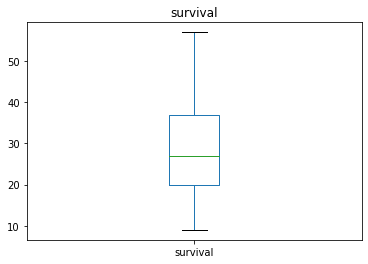

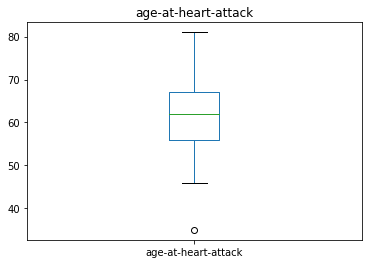

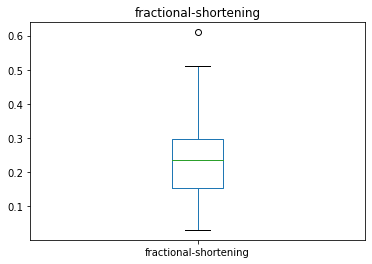

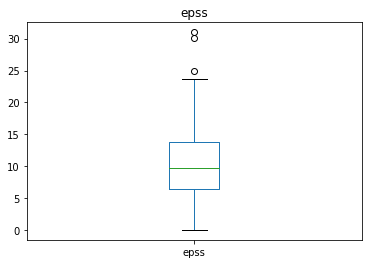

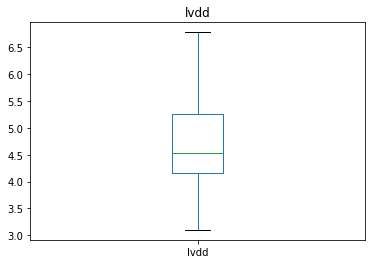

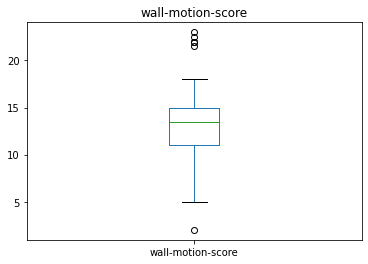

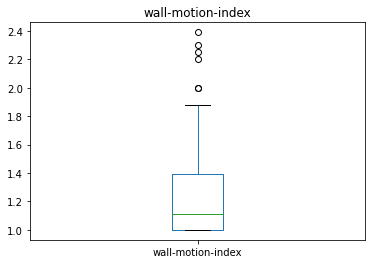

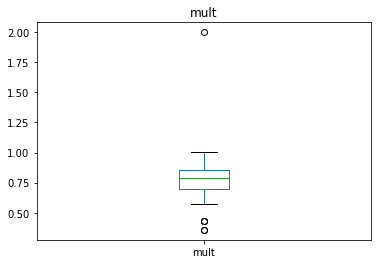

In [9]:
discrete = ['pericardial-effusion']
continuous = df1.drop(['pericardial-effusion', 'still-alive'], axis=1).columns

for feature in continuous:
    df1.boxplot(column=feature, grid = False)
    plt.title(feature)
    plt.show()

As we can see, the plots above show that the features that (mostly) have outliers are: 'wall-motion-score', 'wall-motion-index' and 'mult'.

In [10]:
features_with_outliers = ['wall-motion-score', 'wall-motion-index', 'mult']

In [11]:
for feature in continuous:
    if feature in features_with_outliers:
         df1[feature].fillna(df1[feature].median(), inplace=True)
    else:
         df1[feature].fillna(df1[feature].mean(), inplace=True)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 0 to 109
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               77 non-null     float64
 1   still-alive            77 non-null     int64  
 2   age-at-heart-attack    77 non-null     float64
 3   pericardial-effusion   77 non-null     int64  
 4   fractional-shortening  77 non-null     float64
 5   epss                   77 non-null     float64
 6   lvdd                   77 non-null     float64
 7   wall-motion-score      77 non-null     float64
 8   wall-motion-index      77 non-null     float64
 9   mult                   77 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 6.6 KB


As we can see there are no more null values. Now let's see the correlations between the columns and the classes of 'still-alive', which is our target variable.

Text(0.5, 1.0, 'Correlations after removing NaNs')

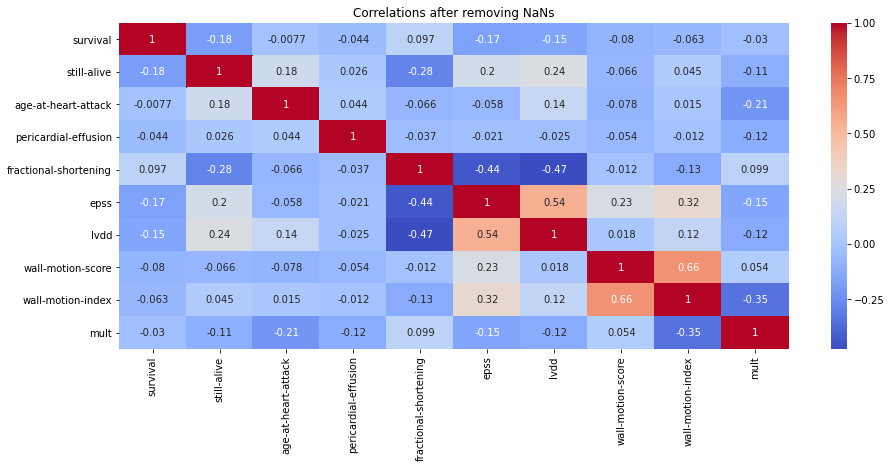

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df1.corr(),annot=True, cmap="coolwarm")
plt.title('Correlations after removing NaNs')

##### Note that 'wall-motion-score' and 'wall-motion-index' are highly correlated and, as recommended by the 'echocardiogram.names' file, we will remove latter and remove the former.

In [14]:
df1 = df1.drop(['wall-motion-score'], axis=1)
continuous = continuous.drop('wall-motion-score')        

print(df1.columns)
print('\n')
print(continuous)

Index(['survival', 'still-alive', 'age-at-heart-attack',
       'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd',
       'wall-motion-index', 'mult'],
      dtype='object')


Index(['survival', 'age-at-heart-attack', 'fractional-shortening', 'epss',
       'lvdd', 'wall-motion-index', 'mult'],
      dtype='object')


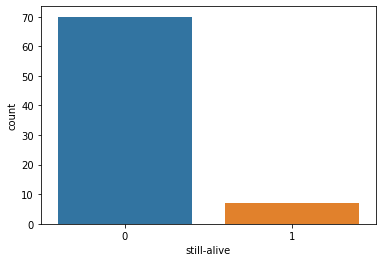

In [15]:
sns.countplot(x='still-alive',data=df1)

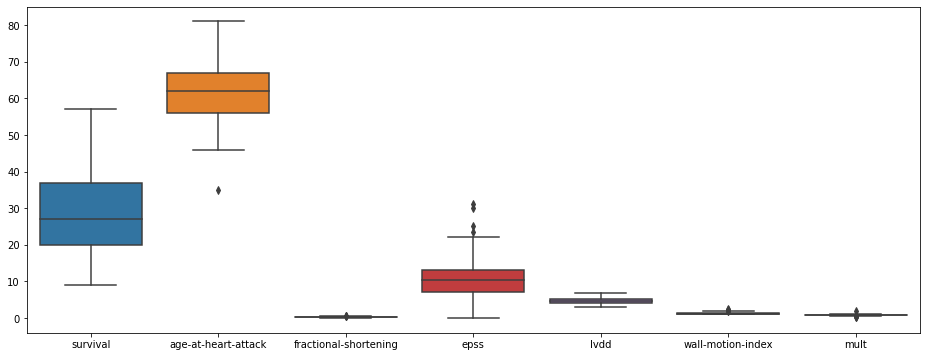

In [16]:
# Let's see the scales of the features
plt.figure(figsize=(16, 6))
sns.boxplot(data=df1[continuous])

We will normalize the continuous variables to improve our model's performance. 

In [17]:
from sklearn.preprocessing import StandardScaler

data1 = pd.get_dummies(df1, columns = discrete, drop_first = True)
scaler = StandardScaler()
data1[continuous] = scaler.fit_transform(data1[continuous])

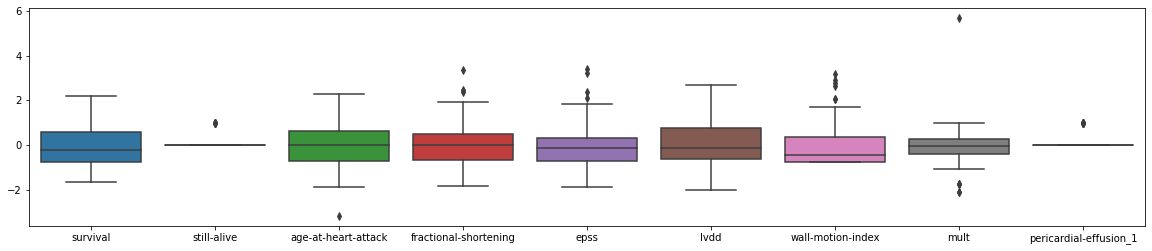

In [18]:
plt.figure(figsize=(20, 4))
sns.boxplot(data=data1)

In [19]:
data1.shape

(77, 9)

In [20]:
# Confirm that there are no duplicates
data1.duplicated().value_counts()

False    77
dtype: int64

## Split Data

In [21]:
df1[(df1['survival']>=24) & (df1['still-alive']==1)].head()

survival  still-alive  age-at-heart-attack  pericardial-effusion  \
94      40.0            1                 74.0                     0   

    fractional-shortening  epss  lvdd  wall-motion-index   mult  
94                    0.2   4.8  4.56               1.04  0.857

#### Note: as shown above, there is only 1 patient that survived for at least 2 years in the dataset. Since this is not enough to train a good model, we will focus on buiding models that predict survivals of at least 1 year. Thus let's keep "still-alive" as our label variable as it is.

In [22]:
X = data1.drop(['still-alive'], axis=1)
y = data1['still-alive']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((53, 8), (24, 8))

### Use SMOTE

Since our target variable is highly imbalanced, we need to reduce the imbalance fraction in order to improve our model. For this purpose, we use SMOTE to oversample our train dataset to a sampling ratio of 0.5 between the 2 labels.

In [24]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy = 0.5, k_neighbors=4)
X_train, y_train = over.fit_resample(X_train, y_train)

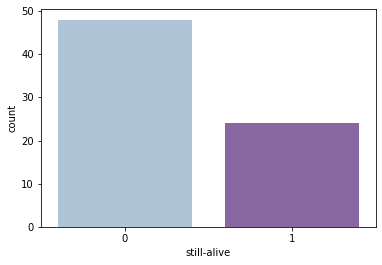

In [25]:
plt.figure(figsize=(6,4))
sns.countplot(x= y_train,palette='BuPu')

In [26]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(72, 8) (72,)
(24, 8) (24,)


# Model Building

We will start building models based on the following algorithms: Support Vector Classifier, Decision Tree Classifier and Random Forest Classifier.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from termcolor import colored

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn import datasets, metrics, model_selection, svm

#### Since our target variable is binary and AUC is a good way for evaluation for such type of problems, we will use the area under curve score to compare our models.

## Model 1: Support Vector Classifier

Accuracy score 
 0.8333333333333334

Average precision score 
 0.08333333333333333

Recall score 
 0.0

F1 score 
 0.0

Classification Report 
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        22
           1       0.00      0.00      0.00         2

    accuracy                           0.83        24
   macro avg       0.45      0.45      0.45        24
weighted avg       0.83      0.83      0.83        24



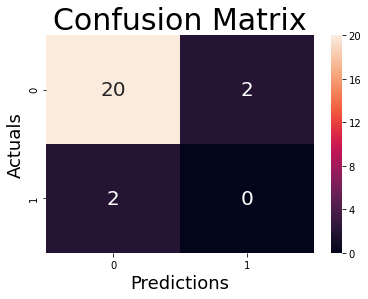

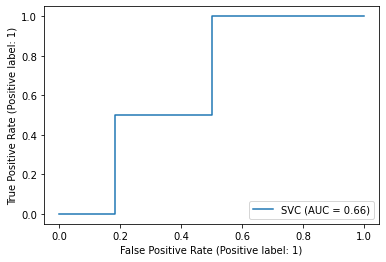

In [28]:
model1 = SVC()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, annot_kws={"size": 20})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title("Confusion Matrix", fontsize = 30)


print(colored("Accuracy score \n", 'red', attrs=['reverse', 'blink']), accuracy_score(y_test, y_pred1))
print()
print(colored('Average precision score \n', 'blue', attrs=['reverse', 'blink']), average_precision_score(y_test,y_pred1))
print()
print(colored('Recall score \n', 'blue', attrs=['reverse', 'blink']), recall_score(y_test,y_pred1))
print()
print(colored('F1 score \n', 'blue', attrs=['reverse', 'blink']), f1_score(y_test,y_pred1))
print()
print(colored('Classification Report \n', 'green', attrs=['reverse', 'blink']),classification_report(y_test,y_pred1))
metrics.plot_roc_curve(model1, X_test, y_test)  

#### In order to improve the performance of this model, we tune the hyperparameters of SVC() with GridSearchCV using f1_macro as scoring.

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# defining parameter range 
SVC_param_grid = {'C': [0.1, 0.5, 1, 2, 5, 10, 20],  
              'gamma': [0.1, 0.5, 1, 0.1, 0.01], 
              'kernel': ['linear', 'rbf']}  
  

gridsearchSVC = GridSearchCV(SVC(), SVC_param_grid, scoring='f1_macro', 
                                  cv=StratifiedKFold(10), return_train_score=True);

%time gridsearchSVC.fit(X_train, y_train)

Wall time: 4.12 s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10, 20],
                         'gamma': [0.1, 0.5, 1, 0.1, 0.01],
                         'kernel': ['linear', 'rbf']},
             return_train_score=True, scoring='f1_macro')

In [30]:
print('Best Parameters                   : ',gridsearchSVC.best_params_)
print('Best Score                        : ',gridsearchSVC.best_score_)
print('Best Estimator                    : ',gridsearchSVC.best_estimator_)

Best Parameters                   :  {'C': 2, 'gamma': 1, 'kernel': 'rbf'}
Best Score                        :  0.9660894660894661
Best Estimator                    :  SVC(C=2, gamma=1)


Accuracy score 
 0.9166666666666666

Average precision score 
 0.08333333333333333

Recall score 
 0.0

F1 score 
 0.0

Classification Report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        22
           1       0.00      0.00      0.00         2

    accuracy                           0.92        24
   macro avg       0.46      0.50      0.48        24
weighted avg       0.84      0.92      0.88        24



C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\felip\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


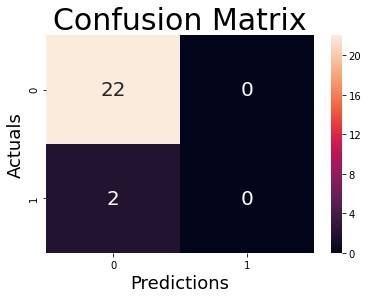

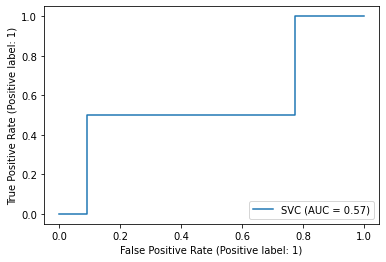

In [31]:
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix

GridsearchSVC_best = gridsearchSVC.best_estimator_
GridsearchSVC_best = GridsearchSVC_best.fit(X_train, y_train)

y_pred_SVC = GridsearchSVC_best.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_SVC), annot=True, annot_kws={"size": 20})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title("Confusion Matrix", fontsize = 30)

print(colored("Accuracy score \n", 'red', attrs=['reverse', 'blink']), accuracy_score(y_test, y_pred_SVC))
print()
print(colored('Average precision score \n', 'blue', attrs=['reverse', 'blink']), average_precision_score(y_test, y_pred_SVC))
print()
print(colored('Recall score \n', 'blue', attrs=['reverse', 'blink']), recall_score(y_test, y_pred_SVC))
print()
print(colored('F1 score \n', 'blue', attrs=['reverse', 'blink']), f1_score(y_test, y_pred_SVC))
print()
print(colored('Classification Report \n', 'green', attrs=['reverse', 'blink']),classification_report(y_test, y_pred_SVC))
metrics.plot_roc_curve(GridsearchSVC_best, X_test, y_test)  

## Model 2: Decision Tree Classifier

Accuracy score 
 0.75

Average precision score 
 0.25

Recall score 
 1.0

F1 score 
 0.4

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.73      0.84        22
           1       0.25      1.00      0.40         2

    accuracy                           0.75        24
   macro avg       0.62      0.86      0.62        24
weighted avg       0.94      0.75      0.81        24



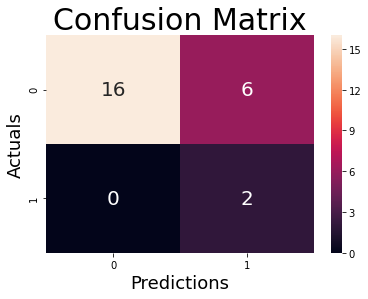

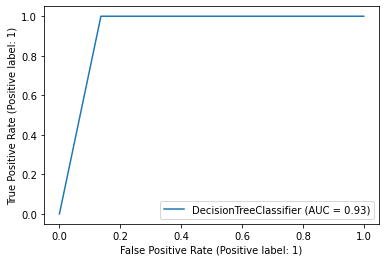

In [32]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)



sns.heatmap(confusion_matrix(y_test, y_pred2), annot=True, annot_kws={"size": 20})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title("Confusion Matrix", fontsize = 30)


print(colored("Accuracy score \n", 'red', attrs=['reverse', 'blink']), accuracy_score(y_test, y_pred2))
print()
print(colored('Average precision score \n', 'blue', attrs=['reverse', 'blink']), average_precision_score(y_test,y_pred2))
print()
print(colored('Recall score \n', 'blue', attrs=['reverse', 'blink']), recall_score(y_test,y_pred2))
print()
print(colored('F1 score \n', 'blue', attrs=['reverse', 'blink']), f1_score(y_test,y_pred2))
print()
print(colored('Classification Report \n', 'green', attrs=['reverse', 'blink']),classification_report(y_test,y_pred2))
metrics.plot_roc_curve(model2, X_test, y_test)  

#### In order to improve the performance of this model, we tune the hyperparameters of SVC() with GridSearchCV using f1_macro as scoring.

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold


# defining parameter range 
DT_param_grid = {'max_depth': range(1, 20),  
              'min_samples_split': range(1,10), 
              'min_samples_leaf': range(1,5),
              'criterion': ['gini', 'entropy']}  
  

gridsearchDT = GridSearchCV(DecisionTreeClassifier(), DT_param_grid, scoring='f1_macro', n_jobs=-1, 
                                  cv=StratifiedKFold(10), return_train_score=True);

%time gridsearchDT.fit(X_train, y_train)

Wall time: 23.4 s


C:\Users\felip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.78666667 0.78666667 ... 0.88257576 0.88257576 0.88257576]
  warnings.warn(
C:\Users\felip\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the train scores are non-finite: [       nan 0.78832168 0.78832168 ... 0.97562371 0.97562371 0.97562371]
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             return_train_score=True, scoring='f1_macro')

In [34]:
print('Best Parameters                   : ',gridsearchDT.best_params_)
print('Best Score                        : ',gridsearchDT.best_score_)
print('Best Estimator                    : ',gridsearchDT.best_estimator_)

Best Parameters                   :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score                        :  0.9222005772005772
Best Estimator                    :  DecisionTreeClassifier(max_depth=5)


Accuracy score 
 0.7916666666666666

Average precision score 
 0.2857142857142857

Recall score 
 1.0

F1 score 
 0.4444444444444445

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        22
           1       0.29      1.00      0.44         2

    accuracy                           0.79        24
   macro avg       0.64      0.89      0.66        24
weighted avg       0.94      0.79      0.84        24



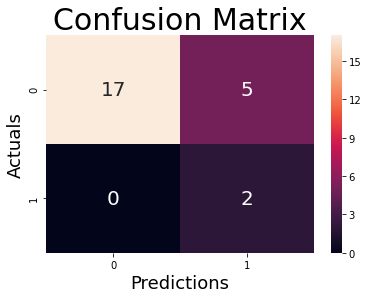

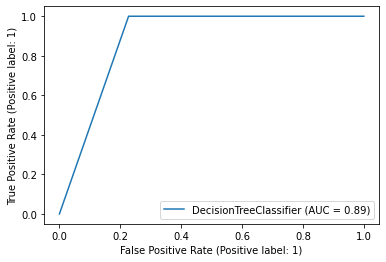

In [35]:
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix

GridsearchDT_best = gridsearchDT.best_estimator_
GridsearchDT_best = GridsearchDT_best.fit(X_train, y_train)

y_pred_DT = GridsearchDT_best.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_DT), annot=True, annot_kws={"size": 20})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title("Confusion Matrix", fontsize = 30)

print(colored("Accuracy score \n", 'red', attrs=['reverse', 'blink']), accuracy_score(y_test, y_pred_DT))
print()
print(colored('Average precision score \n', 'blue', attrs=['reverse', 'blink']), average_precision_score(y_test, y_pred_DT))
print()
print(colored('Recall score \n', 'blue', attrs=['reverse', 'blink']), recall_score(y_test, y_pred_DT))
print()
print(colored('F1 score \n', 'blue', attrs=['reverse', 'blink']), f1_score(y_test, y_pred_DT))
print()
print(colored('Classification Report \n', 'green', attrs=['reverse', 'blink']),classification_report(y_test, y_pred_DT))
metrics.plot_roc_curve(GridsearchDT_best, X_test, y_test)  

## Model 3: Random Forest Classifier

Accuracy score 
 0.875

Average precision score 
 0.20833333333333331

Recall score 
 0.5

F1 score 
 0.4

Classification Report 
               precision    recall  f1-score   support

           0       0.95      0.91      0.93        22
           1       0.33      0.50      0.40         2

    accuracy                           0.88        24
   macro avg       0.64      0.70      0.67        24
weighted avg       0.90      0.88      0.89        24



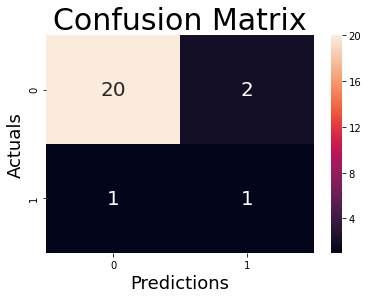

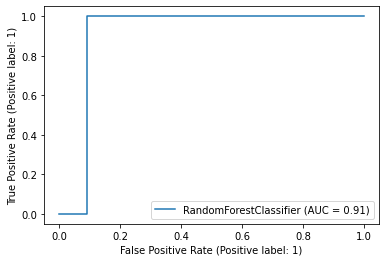

In [36]:
model3 = RandomForestClassifier(max_depth=6)
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred3), annot=True, annot_kws={"size": 20})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title("Confusion Matrix", fontsize = 30)

print(colored("Accuracy score \n", 'red', attrs=['reverse', 'blink']), accuracy_score(y_test, y_pred3))
print()
print(colored('Average precision score \n', 'blue', attrs=['reverse', 'blink']), average_precision_score(y_test,y_pred3))
print()
print(colored('Recall score \n', 'blue', attrs=['reverse', 'blink']), recall_score(y_test,y_pred3))
print()
print(colored('F1 score \n', 'blue', attrs=['reverse', 'blink']), f1_score(y_test,y_pred3))
print()
print(colored('Classification Report \n', 'green', attrs=['reverse', 'blink']),classification_report(y_test,y_pred3))
metrics.plot_roc_curve(model3, X_test, y_test)  

#### In order to improve the performance of this model, we tune the hyperparameters with GridSearchCV using roc_auc as scoring.

In [37]:
from sklearn.model_selection import GridSearchCV

RandomForest_auc = RandomForestClassifier(random_state = 101)

params = {'criterion': ('gini', 'entropy'), 
              'min_samples_split': [2],
              'n_estimators': [5, 10, 20, 50, 100],
              'max_depth': [None, 2,6 , 10, 15, 20], 
              'min_samples_leaf': [1, 2, 3, 5, 10],
              'max_features':[None, 'auto'], 
              'max_leaf_nodes':[None, 10, 50]}

gridsearchRFC_auc = GridSearchCV(RandomForest_auc, params, scoring='roc_auc', cv=10, return_train_score=True)

%time gridsearchRFC_auc.fit(X_train, y_train)

Wall time: 13min 50s


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [None, 2, 6, 10, 15, 20],
                         'max_features': [None, 'auto'],
                         'max_leaf_nodes': [None, 10, 50],
                         'min_samples_leaf': [1, 2, 3, 5, 10],
                         'min_samples_split': [2],
                         'n_estimators': [5, 10, 20, 50, 100]},
             return_train_score=True, scoring='roc_auc')

In [38]:
print('Best Parameters                   : ',gridsearchRFC_auc.best_params_)
print('Best Score                        : ',gridsearchRFC_auc.best_score_)
print('Best Estimator                    : ',gridsearchRFC_auc.best_estimator_)

Best Parameters                   :  {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score                        :  0.99
Best Estimator                    :  RandomForestClassifier(max_features=None, n_estimators=50, random_state=101)


Accuracy score 
 0.8333333333333334

Average precision score 
 0.3333333333333333

Recall score 
 1.0

F1 score 
 0.5

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.33      1.00      0.50         2

    accuracy                           0.83        24
   macro avg       0.67      0.91      0.70        24
weighted avg       0.94      0.83      0.87        24



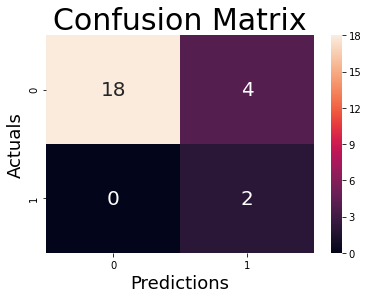

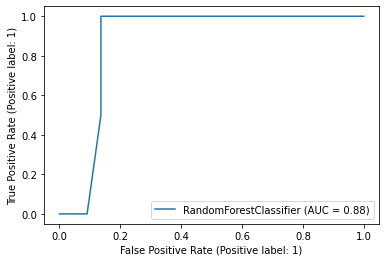

In [39]:
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, f1_score, log_loss, confusion_matrix

GridsearchRFC_best_auc = gridsearchRFC_auc.best_estimator_
GridsearchRFC_best_auc = GridsearchRFC_best_auc.fit(X_train, y_train)

y_pred_RFC_auc = GridsearchRFC_best_auc.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred_RFC_auc), annot=True, annot_kws={"size": 20})
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title("Confusion Matrix", fontsize = 30)

print(colored("Accuracy score \n", 'red', attrs=['reverse', 'blink']), accuracy_score(y_test, y_pred_RFC_auc))
print()
print(colored('Average precision score \n', 'blue', attrs=['reverse', 'blink']), average_precision_score(y_test, y_pred_RFC_auc))
print()
print(colored('Recall score \n', 'blue', attrs=['reverse', 'blink']), recall_score(y_test, y_pred_RFC_auc))
print()
print(colored('F1 score \n', 'blue', attrs=['reverse', 'blink']), f1_score(y_test, y_pred_RFC_auc))
print()
print(colored('Classification Report \n', 'green', attrs=['reverse', 'blink']),classification_report(y_test, y_pred_RFC_auc))
metrics.plot_roc_curve(GridsearchRFC_best_auc, X_test, y_test)  

As a result of our analysis, we conclude that our best models with better AUC are model2=DecisionTreeClassifier(max_depth=3) and RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=101) obtained from the GridSearchCV hyperparameter tuning task.

### Feature Importance Calculation

In order to find the best features for this model, we will run a Recursive Feature Elimination with cross validation to see what is the best number of optimal features to increase the model performance and compare their importances. Here the area under the ROC curve will be our scoring metric used to compare the features.

In [40]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

rfc = RandomForestClassifier(random_state=101)
rfecv_auc = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='roc_auc')
rfecv_auc.fit(X_train, y_train)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='roc_auc')

In [41]:
print('Optimal number of features: {}'.format(rfecv_auc.n_features_))

Optimal number of features: 5


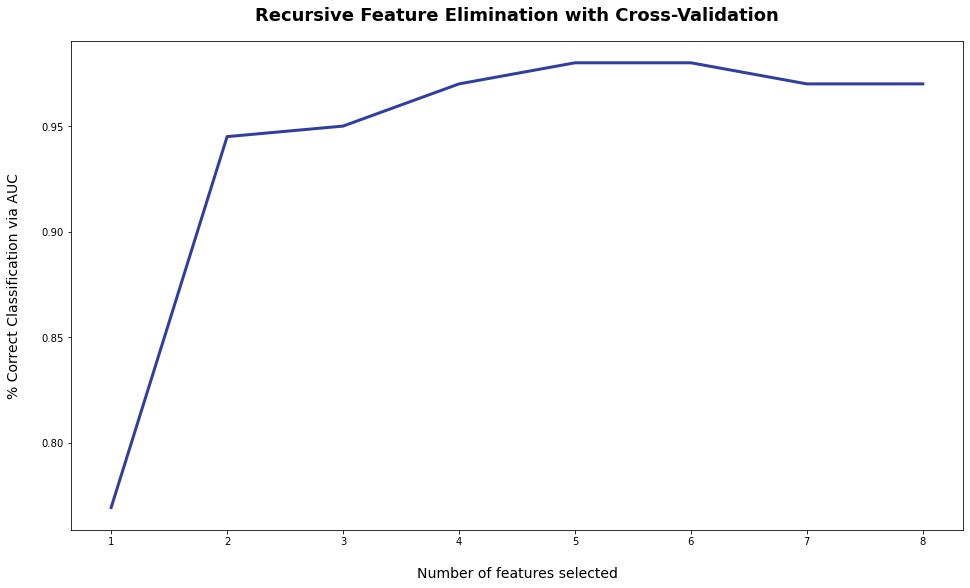

In [42]:
# Let's see how the roc_auc score varies with respect to the number of features
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification via AUC', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv_auc.grid_scores_) + 1), rfecv_auc.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [43]:
# Let's create a dataframe that shows the importance of the features with respect to their F1 score
feature_names = X.columns

imp_auc = pd.DataFrame({'Feature': feature_names, 'Importance': rfecv_auc.grid_scores_})
imp_auc = imp_auc.sort_values('Importance', ascending=False)
imp_auc.head(10)

Feature  Importance
4                    lvdd    0.980000
5       wall-motion-index    0.980000
3                    epss    0.970000
6                    mult    0.970000
7  pericardial-effusion_1    0.970000
2   fractional-shortening    0.950000
1     age-at-heart-attack    0.945000
0                survival    0.769167

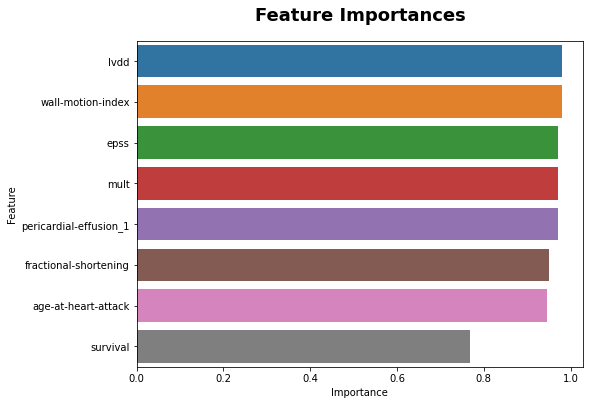

In [44]:
plt.figure(figsize=(8, 6))
plt.title('Feature Importances', fontsize=18, fontweight='bold', pad=20)
sns.barplot(y=imp_auc['Feature'][0:20], x=imp_auc['Importance'][0:20], data=imp_auc)

#### As a result of this analysis, we conclude that the optimal number of features in this problem is 5, where the "survival" and the "fractional-shortening" are the ones that less contribute to obtain a better AUC score.

# Model Test on "echocardiogram.test" file

In [45]:
df2 = pd.read_table('echocardiogram.test', sep=',', names=names)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               20 non-null     object 
 1   still-alive            20 non-null     object 
 2   age-at-heart-attack    19 non-null     object 
 3   pericardial-effusion   20 non-null     int64  
 4   fractional-shortening  20 non-null     float64
 5   epss                   20 non-null     float64
 6   lvdd                   20 non-null     float64
 7   wall-motion-score      20 non-null     float64
 8   wall-motion-index      20 non-null     float64
 9   mult                   20 non-null     float64
 10  name                   20 non-null     object 
 11  group                  20 non-null     object 
 12  alive-at-1             20 non-null     object 
dtypes: float64(6), int64(1), object(6)
memory usage: 2.2+ KB


In [46]:
# Explore the dataset with the help of Pandas Profiling
profile2 = ProfileReport(df2, title='Report of Echocardiogram Test File', html={'style':{'full_width':True}})
profile2

#### Let's clean the test dataset the same way we did with the 'echocardiogram.data' dataset.

In [47]:
df2 = df2.drop(['name', 'group', 'alive-at-1', 'wall-motion-score'], axis=1)
df2[['survival', 'still-alive', 'age-at-heart-attack', 'fractional-shortening', 'epss', 'lvdd', 
   'wall-motion-index', 'mult']] = df2[['survival', 'still-alive', 'age-at-heart-attack', 'fractional-shortening', 'epss', 'lvdd',
   'wall-motion-index', 'mult']].apply(pd.to_numeric, errors = 'coerce')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               0 non-null      float64
 1   still-alive            0 non-null      float64
 2   age-at-heart-attack    17 non-null     float64
 3   pericardial-effusion   20 non-null     int64  
 4   fractional-shortening  20 non-null     float64
 5   epss                   20 non-null     float64
 6   lvdd                   20 non-null     float64
 7   wall-motion-index      20 non-null     float64
 8   mult                   20 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 1.5 KB


In [48]:
# Drop the outlier value of pericardial-effusion = 64 and fill null values of 'age-at-heart-attack' with mean()
df2 = df2.drop(df2[df2['pericardial-effusion']==64].index, axis=0)
df2['age-at-heart-attack'] = df2['age-at-heart-attack'].fillna(df2['age-at-heart-attack'].mean())
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 0 to 19
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   survival               0 non-null      float64
 1   still-alive            0 non-null      float64
 2   age-at-heart-attack    19 non-null     float64
 3   pericardial-effusion   19 non-null     int64  
 4   fractional-shortening  19 non-null     float64
 5   epss                   19 non-null     float64
 6   lvdd                   19 non-null     float64
 7   wall-motion-index      19 non-null     float64
 8   mult                   19 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 1.5 KB


Here in this test dataset there is no information from the 'survival' and 'still-alive' columns because they are all null. 
We saw in our Feature Importance Calculation section that the 'survival' feature is the less important feature to obtain better roc_auc scores. Therefore, before applying our best models on the 'echocardiogram.test' dataset, we will drop the 'survival' column and then use the predictions of the models to label the dataset. 

In [49]:
TRAINdf = df1.drop(['survival'], axis=1)
TESTdf = df2.drop(['survival'], axis=1)
X_TRAIN = TRAINdf.drop('still-alive', axis=1)
y_TRAIN = TRAINdf['still-alive']
X_TEST = TESTdf.drop('still-alive', axis=1)

In [50]:
X_TEST.head()

age-at-heart-attack  pericardial-effusion  fractional-shortening  epss  \
0              61.0000                     0                   0.27   9.0   
1              59.0000                     1                   0.40   9.2   
2              57.0000                     0                   0.29   9.4   
3              62.0000                     1                   0.19  28.9   
4              59.9375                     0                   0.26   0.0   

   lvdd  wall-motion-index   mult  
0  4.06               1.00  0.857  
1  5.36               1.00  0.857  
2  4.77               1.00  0.640  
3  6.63               1.95  0.714  
4  4.38               1.00  0.640

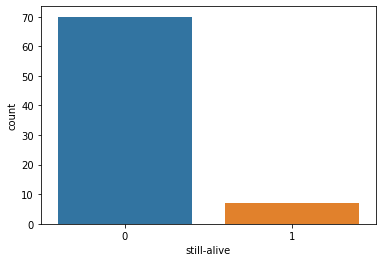

In [51]:
sns.countplot(x='still-alive',data=TRAINdf)

#### Let's use SMOTE again to reduce the label imbalance present in the y_TRAIN dataset by oversampling it.

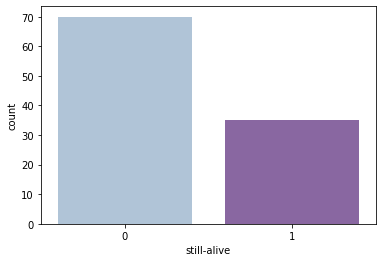

In [52]:
over = SMOTE(sampling_strategy = 0.5, k_neighbors=4)
X_TRAIN, y_TRAIN = over.fit_resample(X_TRAIN, y_TRAIN)
plt.figure(figsize=(6,4))
sns.countplot(x=y_TRAIN,palette='BuPu')

Now let's use our best models to predict the survivals of the test dataset.

## Model 2: DecisionTreeClassifier

In [53]:
model2 = DecisionTreeClassifier(max_depth=3)
model2.fit(X_TRAIN,y_TRAIN)
pred1 = model2.predict(X_TEST)

In [54]:
TESTdf['still-alive'] = pred1
TESTdf.head(30)

still-alive  age-at-heart-attack  pericardial-effusion  \
0             0              61.0000                     0   
1             0              59.0000                     1   
2             0              57.0000                     0   
3             1              62.0000                     1   
4             0              59.9375                     0   
5             0              54.0000                     0   
6             0              62.0000                     1   
7             0              59.9375                     0   
8             0              64.0000                     0   
9             0              57.0000                     1   
10            0              61.0000                     0   
11            1              61.0000                     1   
12            0              48.0000                     0   
13            1              59.9375                     0   
14            1              61.0000                     0   
16            0              64.0000                     0   
17            0              69.0000                     0   
18            0              57.0000                     0   
19            0              62.0000                     0   

    fractional-shortening  epss  lvdd  wall-motion-index   mult  
0                    0.27   9.0  4.06              1.000  0.857  
1                    0.40   9.2  5.36              1.000  0.857  
2                    0.29   9.4  4.77              1.000  0.640  
3                    0.19  28.9  6.63              1.950  0.714  
4                    0.26   0.0  4.38              1.000  0.640  
5                    0.43   9.3  4.79              1.000  0.714  
6                    0.24  28.6  5.86              1.950  0.786  
7                    0.23  19.1  5.49              1.200  0.710  
8                    0.15   6.6  4.17              1.270  0.786  
9                    0.12   0.0  2.32              1.375  0.857  
10                   0.18   0.0  4.48              1.375  0.570  
11                   0.19  13.2  5.04              1.730  0.786  
12                   0.15  12.0  3.66              1.000  0.714  
13                   0.09   6.8  4.96              1.080  0.857  
14                   0.14  25.5  5.16              1.270  0.786  
16                   0.28   5.4  5.47              1.100  0.714  
17                   0.20   7.0  5.05              1.210  0.857  
18                   0.14  16.1  4.36              1.360  0.786  
19                   0.15   0.0  4.51              1.409  0.786

Text(0.5, 1.0, 'Predicted')

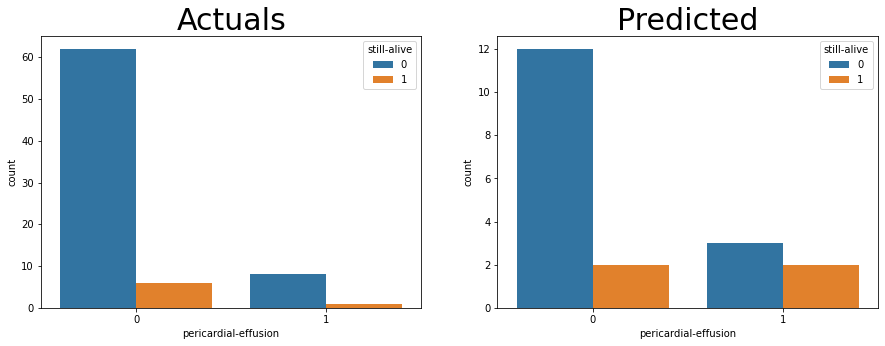

In [76]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(x='pericardial-effusion', data=TRAINdf, hue='still-alive', ax=axs[0])
axs[0].set_title('Actuals', fontsize=30)

sns.countplot(x='pericardial-effusion', data=TESTdf, hue='still-alive', ax=axs[1])
axs[1].set_title('Predicted', fontsize=30)

Text(0.5, 1.0, 'Predicted')

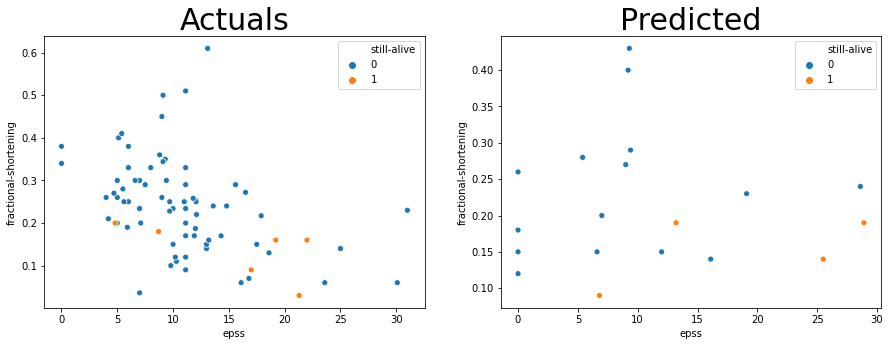

In [77]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))


sns.scatterplot(data=TRAINdf, x="epss", y="fractional-shortening", hue='still-alive', ax=axs[0])
axs[0].set_title('Actuals', fontsize=30)

sns.scatterplot(data=TESTdf, x="epss", y="fractional-shortening", hue='still-alive', ax=axs[1])
axs[1].set_title('Predicted', fontsize=30)

## Model3: Random Forest Classifier

In [55]:
TRAINdf_RFC = df1.drop(['survival'], axis=1)
TESTdf_RFC = df2.drop(['survival'], axis=1)
X_TRAIN_RFC = TRAINdf_RFC.drop('still-alive', axis=1)
y_TRAIN_RFC = TRAINdf_RFC['still-alive']
X_TEST_RFC = TESTdf_RFC.drop('still-alive', axis=1)

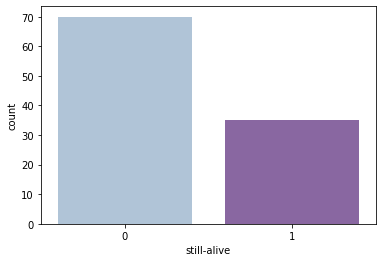

In [56]:
over = SMOTE(sampling_strategy = 0.5, k_neighbors=4)
X_TRAIN_RFC, y_TRAIN_RFC = over.fit_resample(X_TRAIN_RFC, y_TRAIN_RFC)
plt.figure(figsize=(6,4))
sns.countplot(x=y_TRAIN_RFC,palette='BuPu')

In [57]:
Model3 = GridsearchRFC_best_auc
Model3.fit(X_TRAIN_RFC,y_TRAIN_RFC)
pred2 = Model3.predict(X_TEST_RFC)

In [58]:
TESTdf_RFC['still-alive'] = pred2
TESTdf_RFC.head(30)

still-alive  age-at-heart-attack  pericardial-effusion  \
0             0              61.0000                     0   
1             0              59.0000                     1   
2             0              57.0000                     0   
3             0              62.0000                     1   
4             0              59.9375                     0   
5             0              54.0000                     0   
6             0              62.0000                     1   
7             0              59.9375                     0   
8             0              64.0000                     0   
9             0              57.0000                     1   
10            0              61.0000                     0   
11            0              61.0000                     1   
12            0              48.0000                     0   
13            1              59.9375                     0   
14            1              61.0000                     0   
16            0              64.0000                     0   
17            0              69.0000                     0   
18            0              57.0000                     0   
19            0              62.0000                     0   

    fractional-shortening  epss  lvdd  wall-motion-index   mult  
0                    0.27   9.0  4.06              1.000  0.857  
1                    0.40   9.2  5.36              1.000  0.857  
2                    0.29   9.4  4.77              1.000  0.640  
3                    0.19  28.9  6.63              1.950  0.714  
4                    0.26   0.0  4.38              1.000  0.640  
5                    0.43   9.3  4.79              1.000  0.714  
6                    0.24  28.6  5.86              1.950  0.786  
7                    0.23  19.1  5.49              1.200  0.710  
8                    0.15   6.6  4.17              1.270  0.786  
9                    0.12   0.0  2.32              1.375  0.857  
10                   0.18   0.0  4.48              1.375  0.570  
11                   0.19  13.2  5.04              1.730  0.786  
12                   0.15  12.0  3.66              1.000  0.714  
13                   0.09   6.8  4.96              1.080  0.857  
14                   0.14  25.5  5.16              1.270  0.786  
16                   0.28   5.4  5.47              1.100  0.714  
17                   0.20   7.0  5.05              1.210  0.857  
18                   0.14  16.1  4.36              1.360  0.786  
19                   0.15   0.0  4.51              1.409  0.786

Text(0.5, 1.0, 'Predicted')

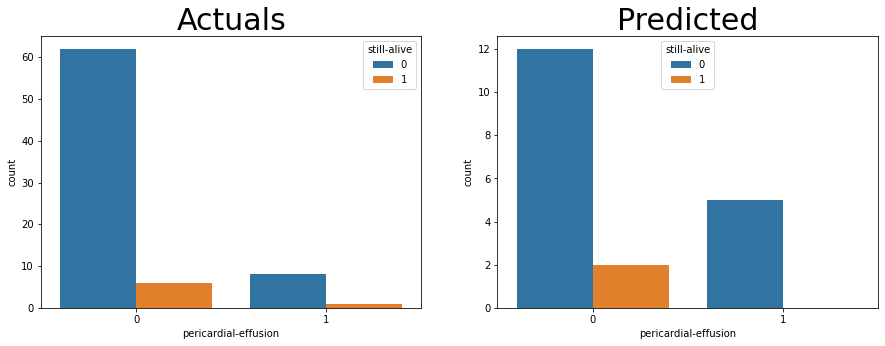

In [71]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))

sns.countplot(x='pericardial-effusion', data=TRAINdf_RFC, hue='still-alive', ax=axs[0])
axs[0].set_title('Actuals', fontsize=30)

sns.countplot(x='pericardial-effusion', data=TESTdf_RFC, hue='still-alive', ax=axs[1])
axs[1].set_title('Predicted', fontsize=30)

Text(0.5, 1.0, 'Predicted')

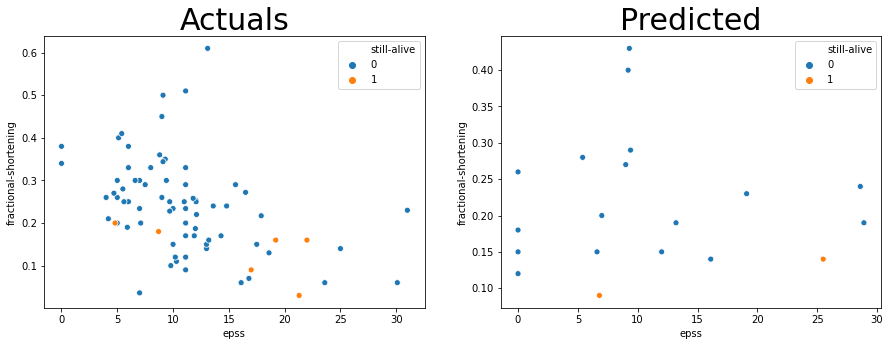

In [75]:
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))


sns.scatterplot(data=TRAINdf_RFC, x="epss", y="fractional-shortening", hue='still-alive', ax=axs[0])
axs[0].set_title('Actuals', fontsize=30)

sns.scatterplot(data=TESTdf_RFC, x="epss", y="fractional-shortening", hue='still-alive', ax=axs[1])
axs[1].set_title('Predicted', fontsize=30)

### Conclusions: 
From our models we predicted which patients survived at least 1 year which are shown in the 'still-alive' column we added to the 'echocardiogram.test' dataset. Note that there are some similarities between our predicted results with the actual cases, such as the smaller the fractional-shortening higher is the patient's chance to survive.